# TD 6

In [12]:
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1 - Distance de Levenshtein

Implémentez l'algorithme de Levenshtein qui donne la distance entre deux chaines de caractères
https://en.wikipedia.org/wiki/Levenshtein_distance

In [2]:
def levenshtein_distance(m1, m2):
    return

In [3]:
levenshtein_distance('agrafe', 'agrae')

## Exercice 2 - X2 d'un tableau de contingence

Réécrivez la formule du chi 2 d'un tableau de contingence, sans utiliser de boucles bien entendu !
La formule est ici : https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test#Testing_for_statistical_independence

In [11]:
def chi_square(O):
    return


chi_square(np.array([[15., 20., 13.], [4., 9., 5.]]))

## Exercice 3 - Traveling Salesman Problem (TSP)

Voici une liste de villes placées aléatoirement sur un plan en 2D.

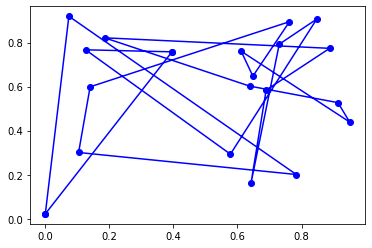

In [23]:
villes = np.random.rand(20, 2)

def dessine_tour(villes, perm):
    plt.plot(
        villes[perm, 0],
        villes[perm, 1],
        'b-o'
    )
    plt.plot(
        [villes[perm[0], 0], villes[perm[-1], 0]],
        [villes[perm[0], 1], villes[perm[-1], 1]],
        'b-o'
    )
    plt.show()
    

dessine_tour(villes, list(range(villes.shape[0])))

Question 1:
Écrivez deux fonctions distance_ville et distance_tour qui renvoient la distance parcourue en visitant chaque ville les unes à la suite des autres

In [18]:
def distance_ville(v1, v2):
    return

def distance_tour(villes, permutation):
    return

distance_tour(villes, list(range(villes.shape[0])))

Question 2: On cherche à parcourir toutes ces villes de manière un peu plus efficace qu'aléatoirement. Une 1ère idée est la suivante : on calcule la distance parcourue de manière aléatoire. Puis on inverse deux villes, et on recalcule la distance totale. Si elle est inférieure à la distance précédente, on conserve cette permutation. On réalise cela jusqu'à échouer n fois de suite.

In [ ]:
def ameliore_tour(villes, n_max=10):
    return

dist, nb_perm, perm = ameliore_tour(villes, n_max=1000)
print("nb perm", nb_perm)
dessine_tour(villes, perm)

Question 3: On remarque que si deux chemins se croisent, on peut retourner une des deux parties du chemin pour réduire la distance totale.

In [ ]:
def ameliore_tour_renversement(villes, n_max=10):
    return

dist, nb_perm, perm = ameliore_tour_renversement(villes, n_max=1000)
print("nb perm", nb_perm)
dessine_tour(villes, perm)

Question 4: On essaye une autre méthode : on prend aléatoirement une ville, on se dirige vers la plus proche, puis la plus proche de la plus proche... sans revenir à une ville précédente.

In [ ]:
def nn_queue_swap(villes):
    return

villes_nn = nn_queue_swap(villes)
print(distance_tour(villes, villes_nn))
dessine_tour(villes, perm)

# Solutions

## Exercice 1

In [7]:
def levenshtein_distance(m1, m2):
    mat = np.zeros((len(m1) + 1, len(m2) + 1))
    for i in range(len(m1) + 1):
        mat[i, 0] = i
    for j in range(len(m2) + 1):
        mat[0, j] = j
    for i in range(1, len(m1) + 1):
        for j in range(1, len(m2) + 1):
            c1 = mat[i-1, j] + 1
            c2 = mat[i, j-1] + 1
            if m1[i-1] == m2[j-1]:
                c = 0
            else:
                c = 1
            c3 = mat[i-1, j-1] + c
            mat[i, j] = min([c1, c2, c3])
    return mat[-1, -1]


levenshtein_distance('agrafe', 'agrae')

1.0

## Exercice 2

In [10]:
def chi_square(O):
    N = np.sum(O)
    pis = np.sum(O, axis=1, keepdims=True) / N
    pjs = np.sum(O, axis=0, keepdims=True) / N
    pispjs = pis @ pjs
    chi = pispjs * ((O / N - pispjs) / pispjs) ** 2
    return np.sum(chi) * N


chi_square(np.array([[15., 20., 13.], [4., 9., 5.]]))

0.5798254016266716

## Exercice 3

In [21]:
# Question 1
def distance_ville(v1, v2):
    return np.sum((v1 - v2) ** 2) ** 0.5

def distance_tour(villes, permutation):
    tour = distance_ville(
        villes[permutation[0]],
        villes[permutation[-1]]
    )
    for i in range(0, len(permutation) - 1):
        tour += distance_ville(
            villes[permutation[i]],
            villes[permutation[i + 1]]
        )
    return tour

distance_tour(villes, list(range(villes.shape[0])))

10.93508454998409

nb perm 37


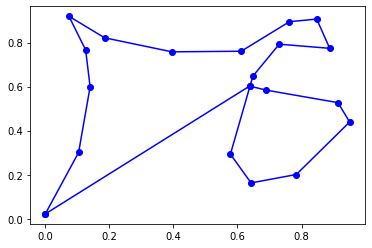

In [45]:
# Question 2
def ameliore_tour(villes, n_max=10):
    perm = list(range(villes.shape[0]))
    dist_min = distance_tour(villes, perm)
    cont = True
    nb_perm, nb_iter = 0, 0
    while cont or nb_iter < n_max:
        nb_iter += 1
        a = np.random.randint(0, len(perm) - 2)
        b = np.random.randint(a + 1, len(perm) - 1)
        perm[a], perm[b] = perm[b], perm[a]
        dist = distance_tour(villes, perm)
        if dist < dist_min:
            dist_min = dist
            cont = True
            nb_perm += 1
            nb_iter = 0
        else:
            perm[a], perm[b] = perm[b], perm[a]
            cont = False
    return dist_min, nb_perm, perm

dist, nb_perm, perm = ameliore_tour(villes, n_max=1000)
print("nb perm", nb_perm)
dessine_tour(villes, perm)

nb perm 26


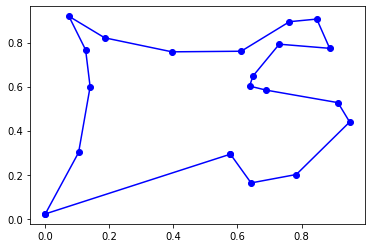

In [44]:
# Question 3
def ameliore_tour_renversement(villes, n_max=10):
    perm = list(range(villes.shape[0]))
    dist_min = distance_tour(villes, perm)
    cont = True
    nb_perm, nb_iter = 0, 0
    while cont or nb_iter < n_max:
        nb_iter += 1
        p0 = perm.copy()
        a = np.random.randint(0, len(perm) - 2)
        b = np.random.randint(a + 1, len(perm) - 1)
        if a == 0:
            perm[0: b] = perm[b: 0: -1]
            perm[b] = p0[0]
        else:
            perm[a: b+1] = perm[b: a-1: -1]
        dist = distance_tour(villes, perm)
        if dist < dist_min:
            dist_min = dist
            cont = True
            nb_perm += 1
            nb_iter = 0
        else:
            perm = p0
            cont = False
    return dist_min, nb_perm, perm

dist, nb_perm, perm = ameliore_tour_renversement(villes, n_max=1000)
print("nb perm", nb_perm)
dessine_tour(villes, perm)

4.108878147308314


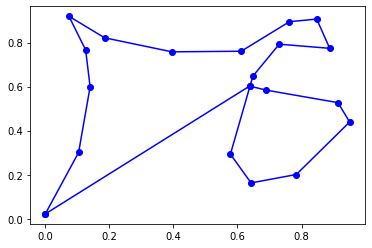

In [46]:
#Question 4
def ville_lp_proche(city, villes):
    dist = ((villes - city) ** 2).sum(axis=1)
    i = np.argmin(dist, axis=0)
    return dist[i], i


def nn_queue_swap(villes):
    villes_cpy = villes.copy()
    result = []
    i = np.random.randint(villes.shape[0])
    cnt = 0
    while cnt < villes.shape[0]-1:
        result.append(i)
        current_city = villes_cpy[i].copy()
        villes_cpy[i] = [np.inf, np.inf]
        _, j = ville_lp_proche(current_city, villes_cpy)
        i = j
        cnt += 1
    result.append(i)
    return result


villes_nn = nn_queue_swap(villes)
print(distance_tour(villes, villes_nn))
dessine_tour(villes, perm)